=== Dataset Overview ===
Shape: (123849, 31)

Columns: ['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']

=== Missing Values Analysis ===


,Missing Values,Percentage
company_name,1719,1.387981
description,7,0.005652
max_salary,94056,75.944093
pay_period,87776,70.873402
company_id,1717,1.386366
views,1689,1.363757
med_salary,117569,94.929309
min_salary,94056,75.944093
applies,100529,81.170619
remote_allowed,108603,87.689848



=== Salary Distribution ===

min_salary statistics:
count    2.979300e+04
mean     6.491085e+04
std      4.959738e+05
min      1.000000e+00
25%      3.700000e+01
50%      6.000000e+04
75%      1.000000e+05
max      8.500000e+07
Name: min_salary, dtype: float64

med_salary statistics:
count      6280.000000
mean      22015.619876
std       52255.873846
min           0.000000
25%          18.940000
50%          25.500000
75%        2510.500000
max      750000.000000
Name: med_salary, dtype: float64

max_salary statistics:
count    2.979300e+04
mean     9.193942e+04
std      7.011101e+05
min      1.000000e+00
25%      4.828000e+01
50%      8.000000e+04
75%      1.400000e+05
max      1.200000e+08
Name: max_salary, dtype: float64

=== Top 10 Job Titles ===


title
Sales Manager                      673
Customer Service Representative    373
Project Manager                    354
Administrative Assistant           254
Senior Accountant                  238
Executive Assistant                228
Salesperson                        211
Registered Nurse                   210
Receptionist                       204
Staff Accountant                   200
Name: count, dtype: int64


=== Top 10 Companies by Job Postings ===


company_name
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Insight Global                                     418
Dice                                               415
Name: count, dtype: int64


=== Top 10 Locations ===


location
United States    8125
New York, NY     2756
Chicago, IL      1834
Houston, TX      1762
Dallas, TX       1383
Atlanta, GA      1363
Boston, MA       1176
Austin, TX       1083
Charlotte, NC    1075
Phoenix, AZ      1059
Name: count, dtype: int64


=== Work Type Distribution ===


formatted_work_type
Full-time     98814
Contract      12117
Part-time      9696
Temporary      1190
Internship      983
Volunteer       562
Other           487
Name: count, dtype: int64


=== Remote Work Distribution ===


remote_allowed
1.0    15246
Name: count, dtype: int64

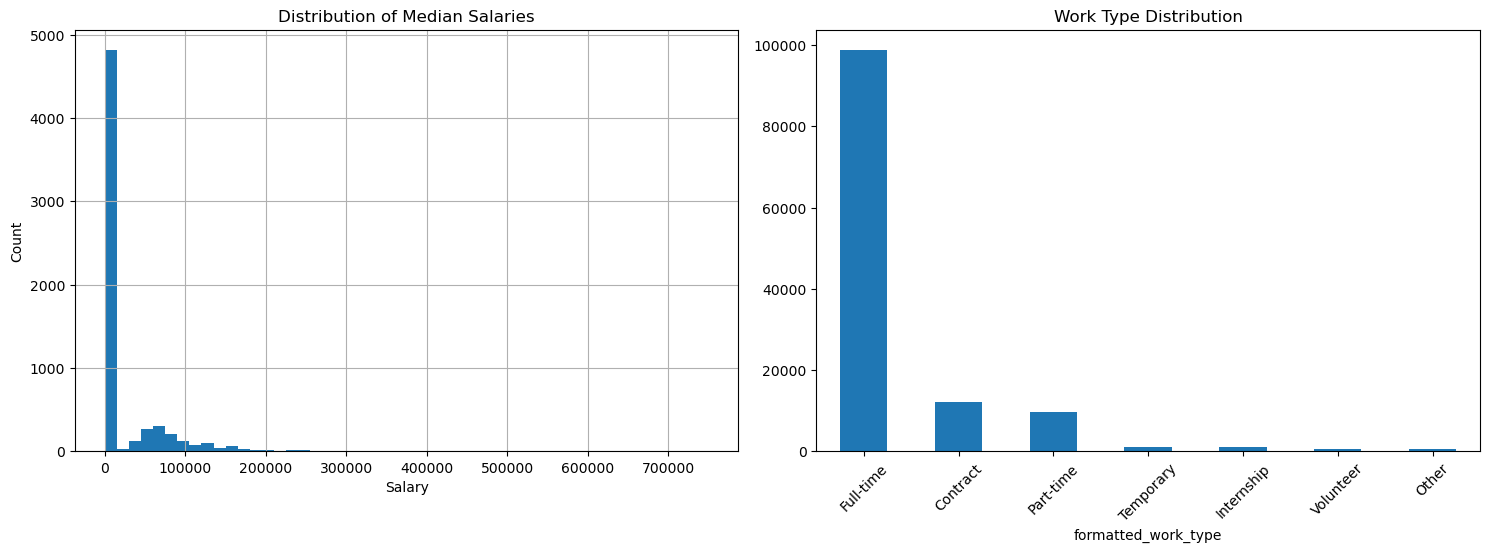

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Load the dataset
df = pd.read_csv('../data/raw/postings.csv')

# 1. Basic Dataset Information
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())

# 2. Data Quality Check
print("\n=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
display(missing_df[missing_df['Missing Values'] > 0])

# 3. Salary Analysis
print("\n=== Salary Distribution ===")
salary_cols = ['min_salary', 'med_salary', 'max_salary']
for col in salary_cols:
    print(f"\n{col} statistics:")
    print(df[col].describe())

# 4. Job Titles Analysis
print("\n=== Top 10 Job Titles ===")
display(df['title'].value_counts().head(10))

# 5. Company Analysis
print("\n=== Top 10 Companies by Job Postings ===")
display(df['company_name'].value_counts().head(10))

# 6. Location Analysis
print("\n=== Top 10 Locations ===")
display(df['location'].value_counts().head(10))

# 7. Work Type Analysis
print("\n=== Work Type Distribution ===")
display(df['formatted_work_type'].value_counts())

# 8. Remote Work Analysis
print("\n=== Remote Work Distribution ===")
display(df['remote_allowed'].value_counts())

# Visualizations
plt.figure(figsize=(15, 10))

# Salary Distribution
plt.subplot(2, 2, 1)
df['med_salary'].hist(bins=50)
plt.title('Distribution of Median Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')

# Work Type Distribution
plt.subplot(2, 2, 2)
df['formatted_work_type'].value_counts().plot(kind='bar')
plt.title('Work Type Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()